## Notebook Purpose

create, view different versions of poisson disc mask

In [1]:
import os, sys
import numpy as np
import numba as nb
import torch
import matplotlib.pyplot as plt
import sigpy
from sigpy.mri.samp import poisson
import random

sys.path.append('/home/vanveen/ConvDecoder/')
from utils.data_io import get_file_list
from include.mri_helpers import load_arj_mask, generate_poisson_disc

### load arjun mask

In [13]:
mask = load_arj_mask(4, '005')
mask.sum() / (torch.numel(mask))

tensor(0.1255)

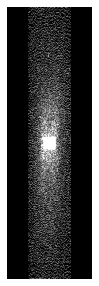

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

### code for generating random masks per arjun

In [24]:
path_m = '/home/vanveen/ConvDecoder/masks/'

for accel in [4,8]:
    
    for c in [24, 32, 40, 64]:
        
        calib = (c,c)

        for ii in np.arange(20):

            mm = generate_poisson_disc(accel, calib=calib)

            fn_out = '{}mask_pd_{}x_calib{}_rand{}.npy'.format(
                                    path_m, accel, c, ii)
#             np.save(fn_out, mm)
            sys.exit()

given accel 4, actual accel 4.051000118255615


SystemExit: 

/home/vanveen/heck/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### 20210405 update: switch to (512,80) + zero pad

(-0.5, 159.5, 511.5, -0.5)

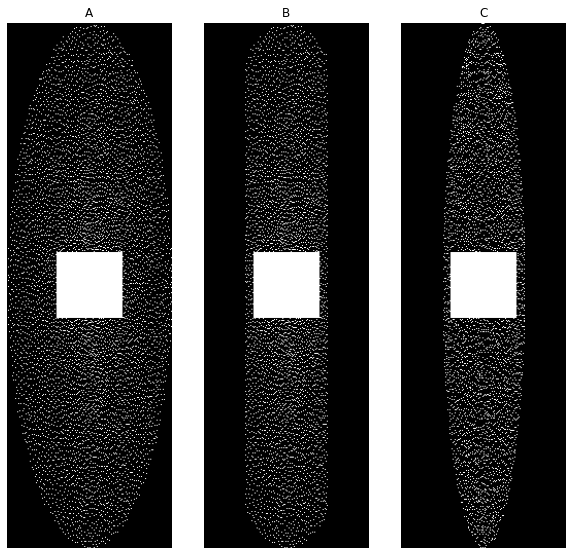

In [47]:
FIGSIZE=10
plt.figure(figsize=(FIGSIZE,FIGSIZE))

plt.subplot(1, 3, 1)
plt.imshow(mask2, cmap='gray')
plt.title('A')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask2_, cmap='gray')
plt.title('B')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mask1_, cmap='gray')
plt.title('C')
plt.axis('off')

### if i generate two random masks iid, how much overlap will there be?
- percentage of redundant pixels, discounting central region
    - accel=4: 26.7%
    - accel=8: 10.0%

In [ ]:
# average number of 1's in each mask, discounting central region
num_1s = 0.5 * (torch.count_nonzero(mask1) + torch.count_nonzero(mask2))
num_1s = num_1s - 4096 # deduct central region from count

# overlapping 1's, discounting central region
mask_and = torch.logical_and(mask1, mask2)
num_1s_and = torch.count_nonzero(mask_and) - 4096

# percentage overlap, discounting central region
num_1s_and / num_1s

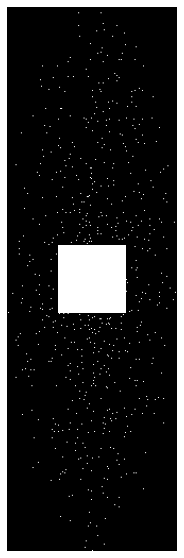

In [10]:
FIGSIZE=10
plt.figure(figsize=(FIGSIZE,FIGSIZE))
plt.axis('off')
plt.imshow(mask_and, cmap='gray')